# First import your libraries and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#use this code to download the files from the GitHub site
#YEARS=list(range(1998,2021))
#for i in YEARS:
#  data = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
#                         'play_by_play_' + str(i) + '.csv.gz?raw=True', compression='gzip', low_memory=False)
#  data.to_csv(f'{i} nfl data.csv', header=True) 

In [3]:
#use this code to export the files to your hard drive, if interested
#from google.colab import files
#for i in YEARS:
#  files.download(f'{i} nfl data.csv')

# Get all the data for only Safeties

In [4]:
YEARS=list(range(1999,2021))

safetydata = pd.DataFrame()

#loop through each csv file, import and filter where 'safety' == 1
for i in YEARS:
  dataset = pd.read_csv(f'{i} nfl data.csv')
  dataset=dataset.loc[(dataset['safety']==1)]
  safetydata = pd.concat([safetydata, dataset])
#reset the index so it goes from 0 to Xn
safetydata.reset_index(inplace=True, drop=True)

c:\users\aceli\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (37,38,180,181,190,191,198,199,204,205,206,207,214,215,219,220,221,223,225,227,249,250,254,255,256,261,263,264,267,268,269,270) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
c:\users\aceli\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (38,46,180,181,183,184,190,191,194,195,198,199,204,205,206,207,219,220,221,249,250,254,255,256,261,263,264) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
c:\users\aceli\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (38,180,181,183,184,190,191,194,195,198,199,204,205,206,207,210,211,214,215,21

Let's process some data so we can run some analysis and add some fields to make the analysis easier.

In [5]:
#now we need to determine who done got safe- possession team or defense
#create a new column 'posteamscore' by getting there difference of the post team score and pos team score post
safetydata['posteamscore']=safetydata['posteam_score_post']-safetydata['posteam_score']
#if the pos team score differential is 2, the scoring team was the pos team
safetydata.loc[safetydata['posteamscore'] == 2, 'scoringteam'] = safetydata['posteam']
#if the score differential was 0, the scoring team was the def team
safetydata.loc[safetydata['posteamscore'] == 0, 'scoringteam'] = safetydata['defteam']

#if the pos team score differential is 2, the broken team was the pos team
safetydata.loc[safetydata['posteamscore'] == 2, 'brokenteam'] = safetydata['defteam']
#if the score differential was 0, the broken team was the def team
safetydata.loc[safetydata['posteamscore'] == 0, 'brokenteam'] = safetydata['posteam']

#game winner, losers, tie
safetydata.loc[safetydata['home_score'] > safetydata['away_score'], 'gamewinner'] = safetydata['home_team']
safetydata.loc[safetydata['home_score'] < safetydata['away_score'], 'gamewinner'] = safetydata['away_team']
safetydata.loc[safetydata['home_score'] == safetydata['away_score'], 'gamewinner'] = 'tie'

In [6]:
safetydata.head()

,Unnamed: 0,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,...,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe,posteamscore,scoringteam,brokenteam,gamewinner
0,603,1110,1999_01_CIN_TEN,1999091204,TEN,CIN,REG,1,CIN,away,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,TEN,CIN,TEN
1,1018,1407,1999_01_DET_SEA,1999091209,SEA,DET,REG,1,SEA,home,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,DET,SEA,DET
2,1752,1796,1999_01_NE_NYJ,1999091207,NYJ,NE,REG,1,NE,away,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NYJ,NE,NE
3,2943,595,1999_02_CLE_TEN,1999091911,TEN,CLE,REG,2,CLE,away,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,TEN,CLE,TEN
4,3385,2839,1999_02_GB_DET,1999091901,DET,GB,REG,2,DET,home,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,GB,DET,DET


# First let's see the total number of safeties per year

In [7]:
#create a dictionary of the unique values in season along with their counts
safety_by_year = dict(safetydata['season'].value_counts())
#need to sort the list since the keys are values
safety_by_year = {key: value for key, value in sorted(safety_by_year.items())}
#pull the keys into a list and a value into another
safety_year=list(map(str,safety_by_year.keys()))
safety_year_count=list(safety_by_year.values())

In [8]:
print('There were ' + str(sum(safety_year_count))+ ' safeties scored between 1999 and 2020')

There were 383 safeties scored between 1999 and 2020


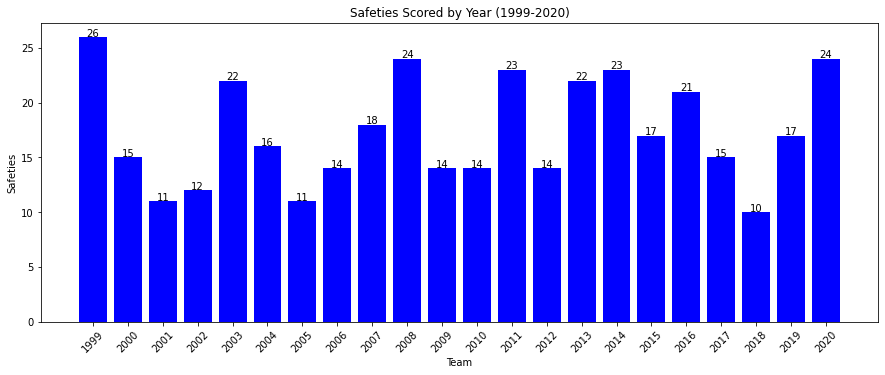

In [9]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+.08,"{:.0f}".format(y[i]), ha='center')

plt.bar(safety_year, safety_year_count, color = 'blue')
plt.title('Safeties Scored by Year (1999-2020)')
plt.xlabel('Team')
plt.ylabel('Safeties')
plt.xticks(rotation=45)
addlabels(safety_year, safety_year_count)
#gcf is get current figure
fig= plt.gcf()
fig.set_size_inches(15, 5.5)
#plt.subplots_adjust(right=0.75)
plt.show()

As we can see, 1999 was dominated by the safety. What a year it was! Honorable mention in 2008 and 2020

# Now let's see what teams scored the most safeties

In [10]:
#create a dictionary of the teams as key and count instances for values. Use scoringteam, created earlier
safety_by_team = dict(safetydata['scoringteam'].value_counts())
#convert to list
safety_teams=list(safety_by_team.keys())
safety_count=list(safety_by_team.values())

In [11]:
#make sure we captured all 383 safeties
print(sum(safety_count))

383


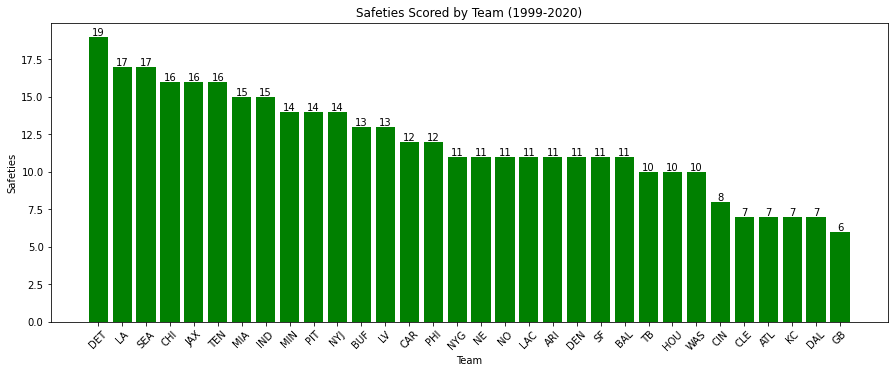

In [12]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+.08,"{:.0f}".format(y[i]), ha='center')

plt.bar(safety_teams, safety_count, color = 'green')
plt.title('Safeties Scored by Team (1999-2020)')
plt.xlabel('Team')
plt.ylabel('Safeties')
plt.xticks(rotation=45)
addlabels(safety_teams, safety_count)
fig= plt.gcf()
fig.set_size_inches(15, 5.5)
#plt.subplots_adjust(right=0.75)
plt.show()

It looks like Detroit is the big winner over this time period! The Motor City is on it's way back!

# We all know giving up a safety is the ultimate back breaker. Who gave up the most safeties?

In [13]:
#create a dictionary of teams that gave up the safety with the count of instances as the value
safety_to_team = dict(safetydata['brokenteam'].value_counts())
#convert to list
safety_to_teams=list(safety_to_team.keys())
safety_to_count=list(safety_to_team.values())

In [14]:
#make sure we got all the data
print(sum(safety_to_count))

383


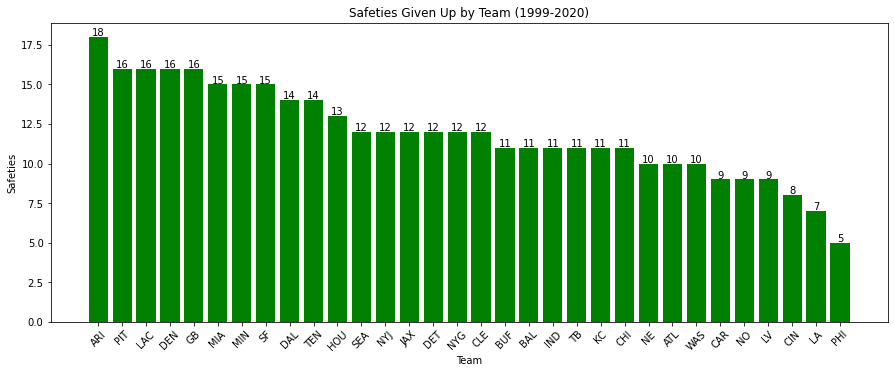

In [15]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+.08,"{:.0f}".format(y[i]), ha='center')

plt.bar(safety_to_teams, safety_to_count, color = 'green')
plt.title('Safeties Given Up by Team (1999-2020)')
plt.xlabel('Team')
plt.ylabel('Safeties')
plt.xticks(rotation=45)
addlabels(safety_to_teams, safety_to_count)
fig= plt.gcf()
fig.set_size_inches(15, 5.5)
#plt.subplots_adjust(right=0.75)
plt.show()

Arizona with the weakest back and Philly with the strongest. This is an interesting dynamic because we should be rooting for the safety over any individual team. Does this mean we like Arizona more? 

Let's move on to the ratio of safeties scored compared to safeties given up. We all know the safety giveth and taketh, but at what rate per team?

In [16]:
#take the dictionaries of safeties scored by teams and divide it by safeties given up
safety_ratio_dict = {k: safety_by_team[k]/safety_to_team[k] for k in safety_to_team}
#sort the dictionary by values, decending
safety_ratio_dict=dict(sorted(safety_ratio_dict.items(), key=lambda x: x[1], reverse=True))

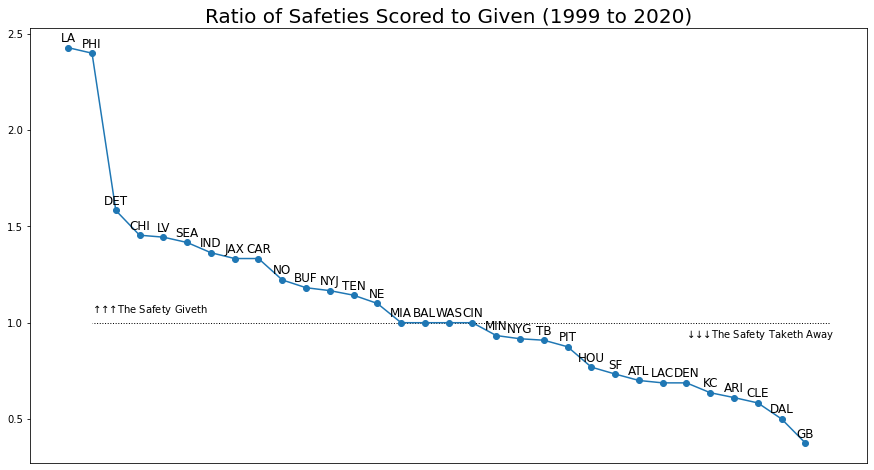

In [17]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+.03,x[i], ha='center', size=12)
#turn dictionary into lists to chart
data = {"x":[], "y":[], "label":[]}
for i, j in safety_ratio_dict.items():
    data["x"].append(i)
    data["y"].append(j)
    data["label"].append(i)
#add some arrows because its super fun
uparrow = u'$\u2191$'
downarrow = u'$\u2193$'

plt.figure(figsize=(15,8))
plt.title('Ratio of Safeties Scored to Given (1999 to 2020)', fontsize=20)
addlabels(data["x"], data["y"])
#remove tick marks
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
#add a line at 1 for the dividing line
plt.plot([32,1], [1,1], color='k', linestyle=':', linewidth=1)
plt.plot(data["x"], data["y"], marker = 'o')
plt.text(26,.92,str(downarrow) + str(downarrow) + str(downarrow) + 'The Safety Taketh Away', ha='left', size=10)
plt.text(1,1.05,str(uparrow) + str(uparrow) + str(uparrow) + 'The Safety Giveth', ha='left', size=10)
plt.show()

# Excellent. Now that we have the fabled GTL (Giveth Taketh Line), let's chart the actual net points scored

In [18]:
#now we want to look at the total net points scored 
#use .copy() so you dont reference the original list and create a whole new one
#two points for safeties scored
points_for_team = safety_by_team.copy()
for key in points_for_team:    
    points_for_team[key] *=  2
#-2 points for safeties given up
points_against_team = safety_to_team.copy()
for key in points_against_team:    
    points_against_team[key] *=  -2

#add the dicitonaries together
net_points = {key: points_for_team.get(key, 0) + points_against_team.get(key, 0)
          for key in set(points_for_team) | set(points_against_team)}
#sort the dictionary
net_points=dict(sorted(net_points.items(), key=lambda x: x[1], reverse=True))
#convert to list
net_points_teams=list(net_points.keys())
net_points_scores=list(net_points.values())

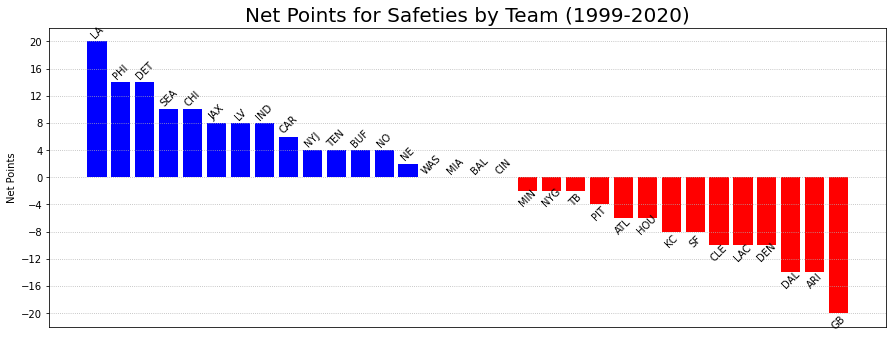

In [19]:
def addlabels(x,y):
    for i,j in zip(x,y):
        if j >= 0:
            plt.text(i,j+.5,i, ha='center',rotation=45)
        if j < 0:
            plt.text(i,j-2.3,i, ha='center',rotation=45)
#let's make net points positive blue and net points negative red 
col = []
for val in net_points_scores:
    if val >= 0:
        col.append('blue')
    else:
        col.append('red')
     
plt.bar(net_points_teams, net_points_scores, color = col)
plt.title('Net Points for Safeties by Team (1999-2020)', size=20)
plt.ylabel('Net Points')
#add grid lines
plt.grid(axis='y', linestyle=':')
addlabels(net_points_teams, net_points_scores)
#change the y axis tick mark intervals
plt.yticks(np.arange(min(net_points_scores), max(net_points_scores)+1, 4))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
fig= plt.gcf()
fig.set_size_inches(15, 5.5)
#plt.subplots_adjust(right=0.75)
plt.show()

# Let's look at teams total safety involvement

In [20]:
#team totals on either side of safety. again, create a dictionary summing the scoring and giving up dictionaries and convert to list
safety_total_team = dict(safetydata['scoringteam'].append(safetydata['brokenteam']).value_counts())
safety_total_teams=list(safety_total_team.keys())
safety_total_count=list(safety_total_team.values())

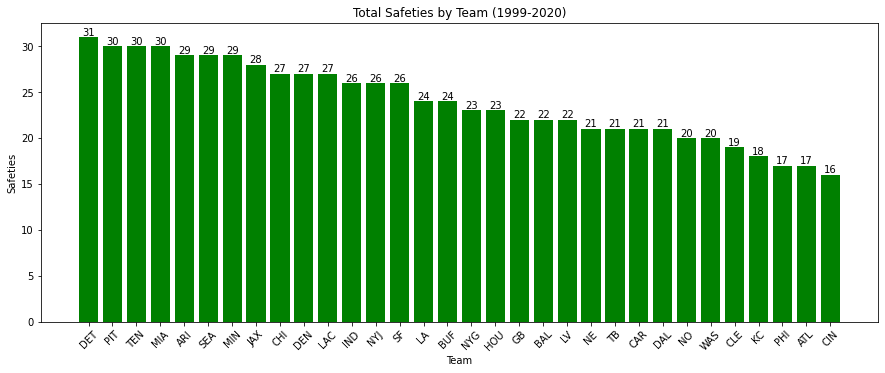

In [21]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+.20,"{:.0f}".format(y[i]), ha='center')

plt.bar(safety_total_teams, safety_total_count, color = 'green')
plt.title('Total Safeties by Team (1999-2020)')
plt.xlabel('Team')
plt.ylabel('Safeties')
plt.xticks(rotation=45)
addlabels(safety_total_teams, safety_total_count)
fig= plt.gcf()
fig.set_size_inches(15, 5.5)
#plt.subplots_adjust(right=0.75)
plt.show()

It's easy to think that, with a safety, there is a winner and a loser. But that doesnt consider the fan, who wins either way!

As if we needed any other reason to dislike Cincy. Fewest safeties either given up for scored. What a boring team to watch. Detroit is the most fun team to watch over this period (W-L record be damned!)

# Let's see where more safeties occur

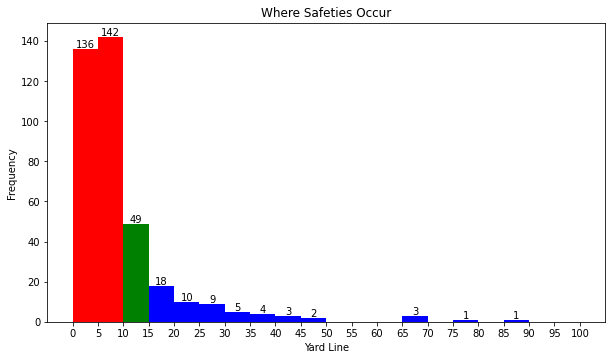

In [22]:
# function to add value labels
bins_list = np.arange(0, 105, 5).tolist()
counts, bins, bars= plt.hist(100-safetydata['yardline_100'], bins=bins_list)

def addlabels(x,y):
    for i,j in zip(x,y):
        if j != 0:
            plt.text(i+2.5,j+.5,"{:.0f}".format(j), ha='center')

#create bins between 0 and 100 with a step of 5
bins_list = np.arange(0, 105, 5).tolist()

plt.title('Where Safeties Occur')
plt.xlabel('Yard Line')
plt.ylabel('Frequency')
plt.xticks(ticks=bins_list)
addlabels(bins, counts)
fig= plt.gcf()
fig.set_size_inches(10, 5.5)
#set color by bin
for i in range(0,2):
    bars[i].set_facecolor('red')
for i in range(2,3):    
    bars[i].set_facecolor('green')
for i in range(3, len(bars)):
    bars[i].set_facecolor('blue')

plt.show()

This yardline is given from the possessing team's field position from their end zone.

Zero to ten is the classic Safety Zone (SZ), with zero to five being plum in the zone.

Ten to fifteen is the teabag zone, for you are one sack away from being in the zone.

Clearly we should all be excited when a team enters any of these zones.

Note the long safeties. Three from 65 to 70 yards. One from 75 to 80 yards. ONE FROM 85 TO 90 YARDS?!
What is going on here?

In [23]:
longsafeties = safetydata.loc[safetydata['yardline_100'] < 50]
pd.options.display.max_colwidth = 1000
print(longsafeties['desc'])

10                                                                                                                                                                                                                                                                                                                                                                                                 (6:36) D.Pederson pass intended for T.Small INTERCEPTED by J.Sehorn at NYG 4. J.Sehorn to NYG 6 for 2 yards. FUMBLES, recovered by NYG-P.Sparks at NYG 0. P.Sparks tackled in End Zone, SAFETY (C.Johnson).
177                                                                                                                                                                                                                                                                                                                                                                                                                      

# All this safety talk has me thinking: were there any games with multiple safeties? The spirit of Dryer compels it!

In [24]:
print(str(len(safetydata)) + ' total safeties between 1999 and 2020')
print(str(len(pd.unique(safetydata['game_id']))) + ' total unique game IDs between 1999 and 2020')

383 total safeties between 1999 and 2020
375 total unique game IDs between 1999 and 2020


In [25]:
multisafetygameids = list(safetydata['game_id'].loc[safetydata['game_id'].duplicated()])
multisafetygames = safetydata[safetydata['game_id'].isin(multisafetygameids)]

In [26]:
multisafetygames.groupby(['game_id','scoringteam']).size()

game_id          scoringteam
1999_04_JAX_PIT  JAX            2
2003_05_ARI_DAL  DAL            2
2003_05_MIN_ATL  MIN            2
2003_11_HOU_BUF  BUF            2
2008_10_GB_MIN   MIN            2
2011_09_STL_ARI  LA             2
2017_13_DEN_MIA  MIA            2
2019_09_NYJ_MIA  MIA            1
                 NYJ            1
dtype: int64

So of the 8 games with multiple safeties, 7 had the two safeties scored by the same team.
Sadly, there is no 3 safetey games over this time period.

# Is the safety REALLY the back breaker?
This is a question that keeps Safety First and all mankind up at night. Do safeties result in wins?

In [27]:
#create a dataframe selecting from the multi game dataframe the rows where the game id is not the split and scoring team is not the winning team
multigamesafetylosers= multisafetygames[['game_id','scoringteam','gamewinner']].loc[(multisafetygames['game_id'] != '2019_09_NYJ_MIA') 
                     & (multisafetygames['scoringteam'] != multisafetygames['gamewinner'])]
#create a dataframe selecting from the multi game dataframe the rows where the game id is not the split and scoring team is the winning team
multigamesafetywinners= multisafetygames[['game_id','scoringteam','gamewinner']].loc[(multisafetygames['game_id'] != '2019_09_NYJ_MIA') 
                     & (multisafetygames['scoringteam'] == multisafetygames['gamewinner'])]
#drop duplicate rows
multigamesafetywinners = multigamesafetywinners.drop_duplicates()
multigamesafetylosers = multigamesafetylosers.drop_duplicates()
print('Games where the team with multiple safeties won\n')
print(multigamesafetywinners)
print('\nGames where the team with multiple safeties lost\n')
print(multigamesafetylosers)

Games where the team with multiple safeties won

             game_id scoringteam gamewinner
8    1999_04_JAX_PIT         JAX        JAX
68   2003_05_ARI_DAL         DAL        DAL
70   2003_05_MIN_ATL         MIN        MIN
157   2008_10_GB_MIN         MIN        MIN
326  2017_13_DEN_MIA         MIA        MIA

Games where the team with multiple safeties lost

             game_id scoringteam gamewinner
76   2003_11_HOU_BUF         BUF        HOU
206  2011_09_STL_ARI          LA        ARI


Of the 8 games with multiple safeties<br>
5 teams with 2 safeties won<br>
2 teams with 2 safeties lost<br>
1 game had the safety scored by both teams

In [28]:
#make a dataframe filtering where the game_id is NOT (~) in the multi safety list and scoring team = gamewinner
singlegamesafetywinners= safetydata[['game_id','scoringteam','gamewinner']].loc[(~safetydata['game_id'].isin(multisafetygameids)) 
                     & (safetydata['scoringteam'] == safetydata['gamewinner'])]
#make a dataframe filtering where the game_id is NOT (~) in the multi safety list and scoring team is not gamewinner
singlegamesafetylosers= safetydata[['game_id','scoringteam','gamewinner']].loc[(~safetydata['game_id'].isin(multisafetygameids)) 
                     & (safetydata['scoringteam'] != safetydata['gamewinner'])]
print('Number of games with a single safety where the scoring team won: ' + str(len(singlegamesafetywinners)))
print('Number of games with a single safety where the scoring team lost: ' + str(len(singlegamesafetylosers)))


Number of games with a single safety where the scoring team won: 240
Number of games with a single safety where the scoring team lost: 127


There we have it.<br>
Between 1999 and 2020 there were 383 safeties scored in 375 games.<br>
In 245 games, the scoring team won for a winning percentage of 65.5%<br>
In 129 games, the scoring team lost for a losing percentage of 34.5%<br>
The denominator excludes the one game where both teams scored a safety.


# What was the margin of victory for games with a safety?

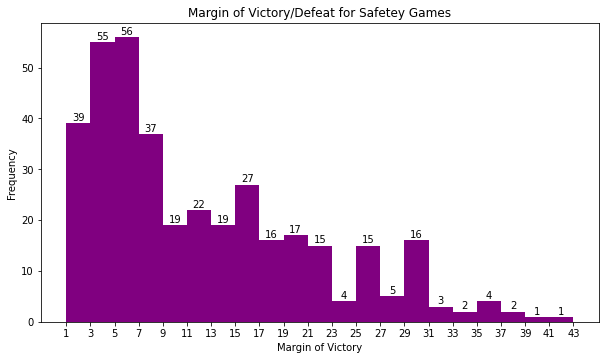

In [29]:
#get the absolute value of the results
safetydata['absresult']= safetydata['result'].abs()

pointmargin = safetydata[['game_id','absresult']]
pointmargin= pointmargin.drop_duplicates()

bins_list = np.arange(1, max(safetydata['absresult'])+1,2).tolist()
counts, bins, bars= plt.hist(pointmargin['absresult'], bins=bins_list)

def addlabels(x,y):
    for i,j in zip(x,y):
        if j != 0:
            plt.text(i+1,j+.5,"{:.0f}".format(j), ha='center')

plt.hist(pointmargin['absresult'], bins=bins_list, color='purple')
plt.title('Margin of Victory/Defeat for Safetey Games')
plt.xlabel('Margin of Victory')
plt.ylabel('Frequency')
plt.xticks(ticks=bins_list)
addlabels(bins, counts)
fig= plt.gcf()
fig.set_size_inches(10, 5.5)
plt.show()

Whoa, 39 games where the margin of victory is less than 3. How many of those games were directly related to the safety?

In [30]:
#select games where the margin of victory is less than 3
winsby2= safetydata[['game_id','scoringteam','gamewinner','absresult']].loc[(safetydata['absresult']<3)]
#drop duplicates if there are games with multiple safeties
winsby2 = winsby2.drop_duplicates()
#winsby2.head()
safetywinsby2 = winsby2.loc[(winsby2['scoringteam'] == winsby2['gamewinner'])]
safetylossesby2 = winsby2.loc[(winsby2['scoringteam'] != winsby2['gamewinner'])]

print('Of the 39 games with a Safety where the margin of victory was 2 or less, the safety scoring team won ' + str(len(safetywinsby2)))

Of the 39 games with a Safety where the margin of victory was 2 or less, the safety scoring team won 22


We need to understand of those games, which ones had the safety as the last score!

In [31]:
#make a list of columns to pass
columns=['game_id','away_score','home_score','defteam_score_post','posteam_score_post','scoringteam','posteam_type','posteam','defteam','defteam_score','posteam_score']
winsby2 = list(safetywinsby2['game_id'])
#create a dataframe of games in the winsby2 lsit
closewins= safetydata[columns].loc[safetydata['game_id'].isin(winsby2)]
#create max and min score columns
closewins['maxscore']= closewins[['away_score','home_score']].max(axis=1)
closewins['minscore']= closewins[['away_score','home_score']].min(axis=1)

In [32]:
#print the game_ids of games where the scores post plays match the final min / max score
closewins['game_id'].loc[(closewins['defteam_score_post'] == closewins['maxscore']) & (closewins['posteam_score_post'] == closewins['minscore']) | 
                  (closewins['posteam_score_post'] == closewins['maxscore']) & (closewins['defteam_score_post'] == closewins['minscore'])]

91     2004_10_CHI_TEN
113     2006_01_BUF_NE
245    2013_09_CIN_MIA
273    2014_16_MIN_MIA
Name: game_id, dtype: object

# When do safeties occur most often?

In [33]:
#create a dictionary of the quarters plus the count
safety_by_quarter = dict(safetydata['qtr'].value_counts())
#need to sort the list since the keys are values
safety_by_quarter = {key: value for key, value in sorted(safety_by_quarter.items())}
#create lists
safety_quarter=list(map(str,safety_by_quarter.keys()))
safety_quarter_count=list(safety_by_quarter.values())

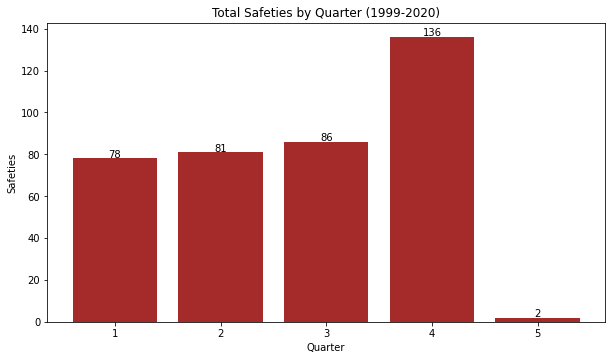

In [34]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+.5,"{:.0f}".format(y[i]), ha='center')

plt.bar(safety_quarter, safety_quarter_count, color = 'brown')
plt.title('Total Safeties by Quarter (1999-2020)')
plt.xlabel('Quarter')
plt.ylabel('Safeties')
addlabels(safety_quarter, safety_quarter_count)
fig= plt.gcf()
fig.set_size_inches(10, 5.5)
plt.show()

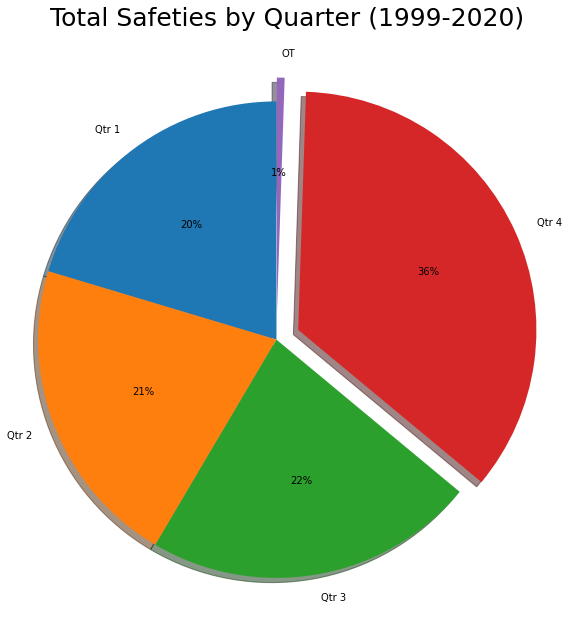

In [35]:
#create a pie chart for the safeties by quarter

#create a new list. if the quarter is less than 5, append Qtr+X. If the quarter is 5, append OT
safety_quarter1 = []
for x in safety_quarter:
    if int(x) < 5:
        safety_quarter1.append('Qtr ' + str(x))
    else:
        safety_quarter1.append('OT')      
#we are going to explode the 4th quarter and OT safetie
explode=(0,0,0,0.1,0.1)
fig1, ax1=plt.subplots()
ax1.pie(safety_quarter_count, explode=explode, labels=safety_quarter1, autopct='%01.0f%%',shadow=True, startangle=90)
#set the axis size to equal so the chart comes out as an even circle
ax1.axis('equal')
#set the background color
fig1.set_facecolor('white')
fig1.set_size_inches(10, 11)
plt.title('Total Safeties by Quarter (1999-2020)', size=25)

plt.show()

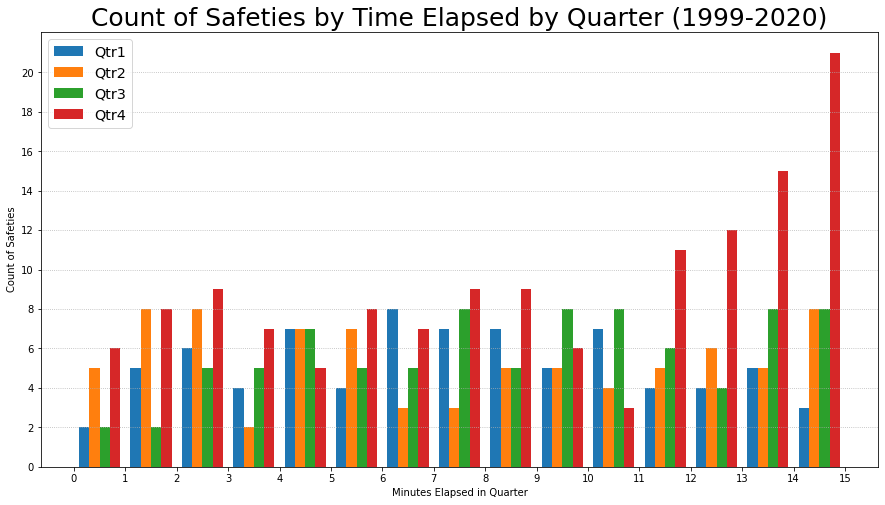

In [58]:
#take the time and quarter fields and turn them into a new dataframe
min_reamin = safetydata[['time','qtr']].copy()
#add 00: to that column to put it in the hh:mm:ss format needed
min_reamin['time'] = ['00:'+ x for x in min_reamin['time']]
#convert that field to seconds and divided by 60. so '1:30' is converted to 1.5
min_reamin['time'] = pd.to_timedelta(min_reamin['time']).astype('timedelta64[s]').astype(int)/60
#time field is originally time remaining in qtr. 15:00= the very start of the quarter. Convert to time elapsed by subracting from 15
min_reamin['time']=15-min_reamin['time']
#max time in a quarter can be 15, so bins are 0 to 15. no step
bins_list = np.arange(0, 16).tolist()
#make list of time elapsed by quarter
qtr1=list(min_reamin['time'].loc[min_reamin['qtr']==1])
qtr2=list(min_reamin['time'].loc[min_reamin['qtr']==2])
qtr3=list(min_reamin['time'].loc[min_reamin['qtr']==3])
qtr4=list(min_reamin['time'].loc[min_reamin['qtr']==4])

#create a histogram
data=[qtr1,qtr2,qtr3,qtr4]
fig, ax = plt.subplots()
counts, bins, bars=plt.hist(data, bins=bins_list)
ax.legend(['Qtr1', 'Qtr2', 'Qtr3','Qtr4'], fontsize='x-large')
plt.title('Count of Safeties by Time Elapsed by Quarter (1999-2020)', size=25)
plt.xlabel('Minutes Elapsed in Quarter')
plt.ylabel('Count of Safeties')
plt.grid(axis='y', linestyle=':')
#need this to get the highest count of the list of arrays to set the proper y max tick
maxcount=[]
for i in counts:
    maxcount.append(max(i))

plt.yticks(np.arange(0, max(maxcount)+1, 2.0))
plt.xticks(np.arange(0, max(bins_list)+1, 1.0))

fig.set_size_inches(15, 8)
plt.show()

In [60]:
safetydata['game_id'].loc[safetydata['season_type']=='POST']

23     1999_18_BUF_TEN
24      1999_20_TB_STL
25     1999_20_TEN_JAX
51     2001_19_PHI_CHI
85      2003_20_IND_NE
101    2004_19_STL_ATL
125    2006_18_DAL_SEA
126     2006_20_NO_CHI
166    2008_18_ATL_ARI
167    2008_19_PHI_NYG
168    2008_21_PIT_ARI
196    2010_20_NYJ_PIT
218    2011_18_ATL_NYG
219     2011_21_NYG_NE
233     2012_21_BAL_SF
254     2013_19_IND_NE
255    2013_21_SEA_DEN
277    2014_18_ARI_CAR
278    2014_18_BAL_PIT
295     2015_18_GB_WAS
316    2016_19_SEA_ATL
Name: game_id, dtype: object